<a href="https://colab.research.google.com/github/Asiyaumar/homework/blob/main/asiya_umar_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3
Homeworks are an individual assessment, you should not work in groups.

You will be turning in:

1. A [README.md](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Admin/READMEexample.md) with all the relevant information
2. An .ipynb or .py with just your code (show all code necessary for the analysis, but remove superfluous code)
3. A PDF with your Report (rendered via Quarto or Google Docs)




## Data
We're going to do some customer segmentation for a **media company** (a digital magazine) to help them understand the needs of their customers better, and put them into useful groups of similar clusters. There are two datasets each of which is a random sample of `200` customers.

### Behavioral Data

[This dataset](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW3_behavioral.csv) contains information about the media company customers' behavior on the site. The variables in the customer data include:

- `id`: customer id
- `gender`: self-disclosed gender identity, `male`, `female`, `nonbinary` or `other`
- `age`: age in years
- `current_income`: self-reported current annual income in thousands
- `time_spent_browsing`: average number of minutes spent browsing website per month
- `prop_ad_clicks`: proportion of website ads that they click on (between `0` and `1`)
- `longest_read_time`: longest time spent consecutively on website in minutes
- `length_of_subscription`: number of days subscribed to the magazine
- `monthly_visits`: average number of visits to the site per month



### Article Data

[This dataset](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW3_topics.csv) contains information about the number of articles customers read in each topic in the past 3 months. The topics in the customer data include:

- `Stocks`
- `Productivity`
- `Fashion`
- `Celebrity`
- `Cryptocurrency`
- `Science`
- `Technology`
- `SelfHelp`
- `Fitness`
- `AI`



## 1. Behavioral Clustering
- Make ggplot scatterplots of pairs of your features to give you a little bit of information about the data, and to help you decide which algorithm to use (you don’t need to make scatterplots for all possible pairs of features, just make sure each feature appears at least once).
- Using `sklearn` `Pipeline`s, build and fit **one** clustering models (choose from **K-Means**, **Gaussian Mixture Models**, **DBSCAN**, and **Hierarchical Clustering**) using all the continuous/interval variables *except* `id`.
- Appropriately Z-score continuous/interval variables.
- Choose the number of clusters (if applicable) and in the **Methods** section of your report, explain how you chose. Also explain **why/how** you chose any relevant hyperparameters (such as linkage, distance metric, eps, min samples...).
- In the **Methods** section of your report, explain **in detail** both the *pros* and *cons* of the all the clustering models (e.g. what type of data do they work well for? Are there any possible downsides of using them?) and *provide a justification* for why you chose the clustering algorithm that you did.
- Using **plotnine** and **PCA**, create a scatterplot of your clusters by plotting the first Principal Component (PC1) on the x-axis, and the second Principal Component (PC2) on the y-axis. Color the points by their cluster. Include this plot in your **Results** Section.
- Create at least one *other* summary of what kind of customers are in each cluster. This could be a different ggplot (built using plotnine), or a neatly formatted summary table (hint: `groupby()`). In the **Results** section, discuss in detail:
    - what kind of customers are in each cluster
    - how the clusters "performed" (e.g. are they good clusters? How can you tell?)
    - how that information might help the company



## 2. Article Clustering
- Using an `sklearn` `Pipeline`, build and fit a **Hierarchical Clustering** model using all the variables *except* `id`. Use cosine similarity as your distance metric (also called `affinity`) and `average` linkage.
- Do **not** z-score, as these are counts.
- Create a dendrogram and in the **Methods** section of your report, explain **what number** of cluster you decided to use and **why**.
- In the **Results** section, discuss the performance of the model based on the dendrogram.
- Create at least one other summary of what kind of customers are in each cluster. This could be a different ggplot (built using plotnine), or a neatly formatted summary table (hint: `groupby()`). In the **Results** section, discuss in detail what kind of customers are in each cluster, and how that information might help the company.



## 3. Report

[QUARTO TEMPLATE HERE](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Homework/Homework3Template.qmd)

[DOCS TEMPLATE HERE](https://docs.google.com/document/d/1ZxUz6WPFjadOh4tkZS0ydkFFXfXQytNf34-Cgx_eap4/edit?usp=sharing)

Your Technical Report is a way to practice presenting and formatting your results like you would in industry. Make sure your report and **plots** are clear, and explain things clearly. Write a report that has the following sections:

1. **Introduction**: description of the problem (e.g. what are you predicting? what variables do you have available? How might this model be useful if you are successful). You should end with a sentence or two about what the impact of these models could be.

2. **Methods**: describe your models in detail (as if explaining them to the CEO of the media company), as well as any pre-processing you had to do to the data.

3. **Results**: How did your models perform? Describe the clusters from your Behavioral Clustering models. Were they different? If so, how? What could the CEO of the media company do with these clusters? Describe the clusters form your Article Clustering model. What could the CEO of the media company do with these clusters?

4. **Discussion/Reflection**: A few sentences about what you learned from performing these analyses, and at least one suggestion for what you'd add or do differently if you were to perform this analysis again in the future.

#1. BEHAVIORAL CLUSTERING

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

from PIL import Image

%matplotlib inline

0.3177889176933468


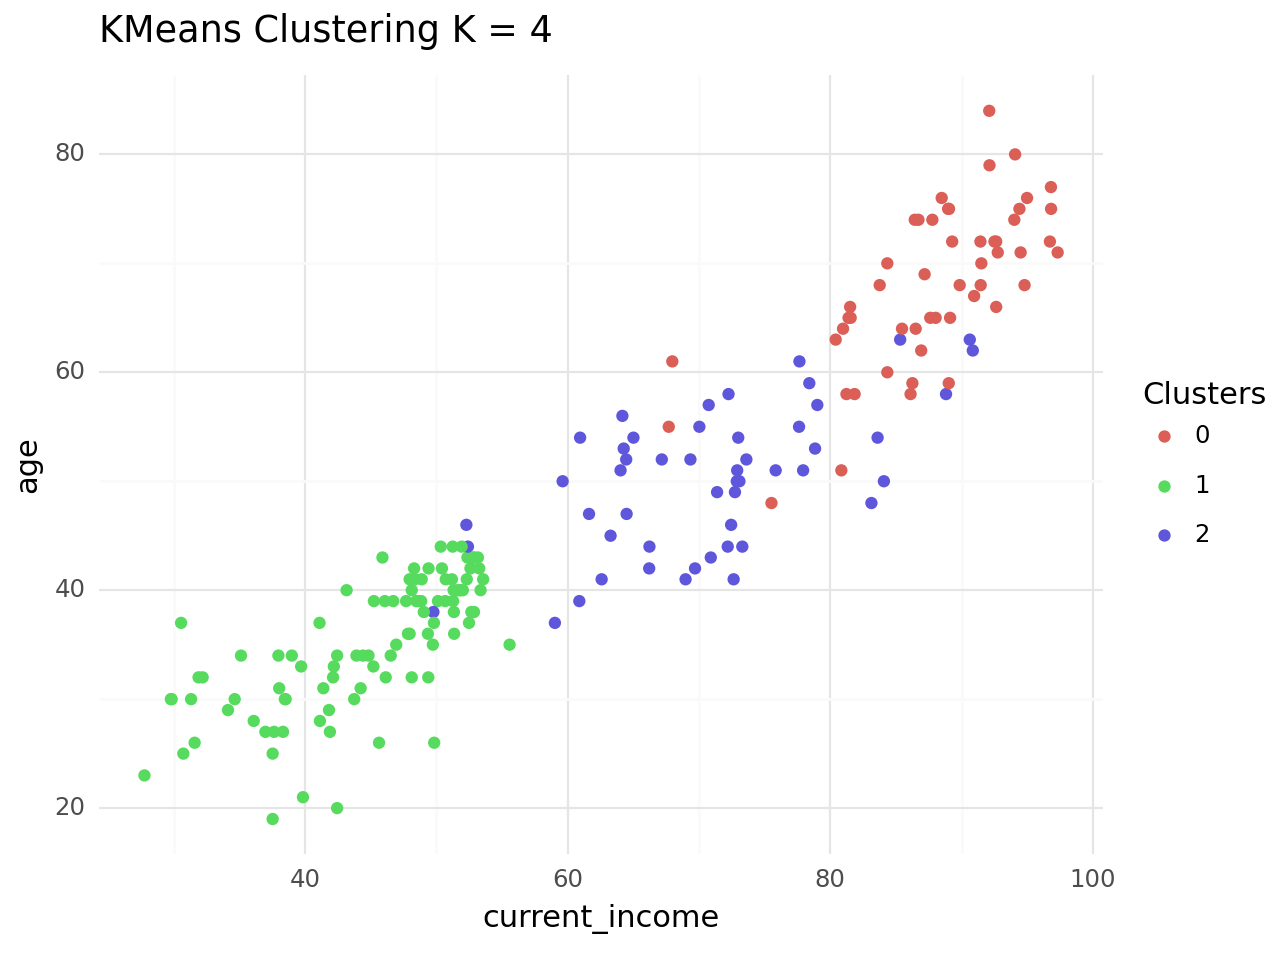

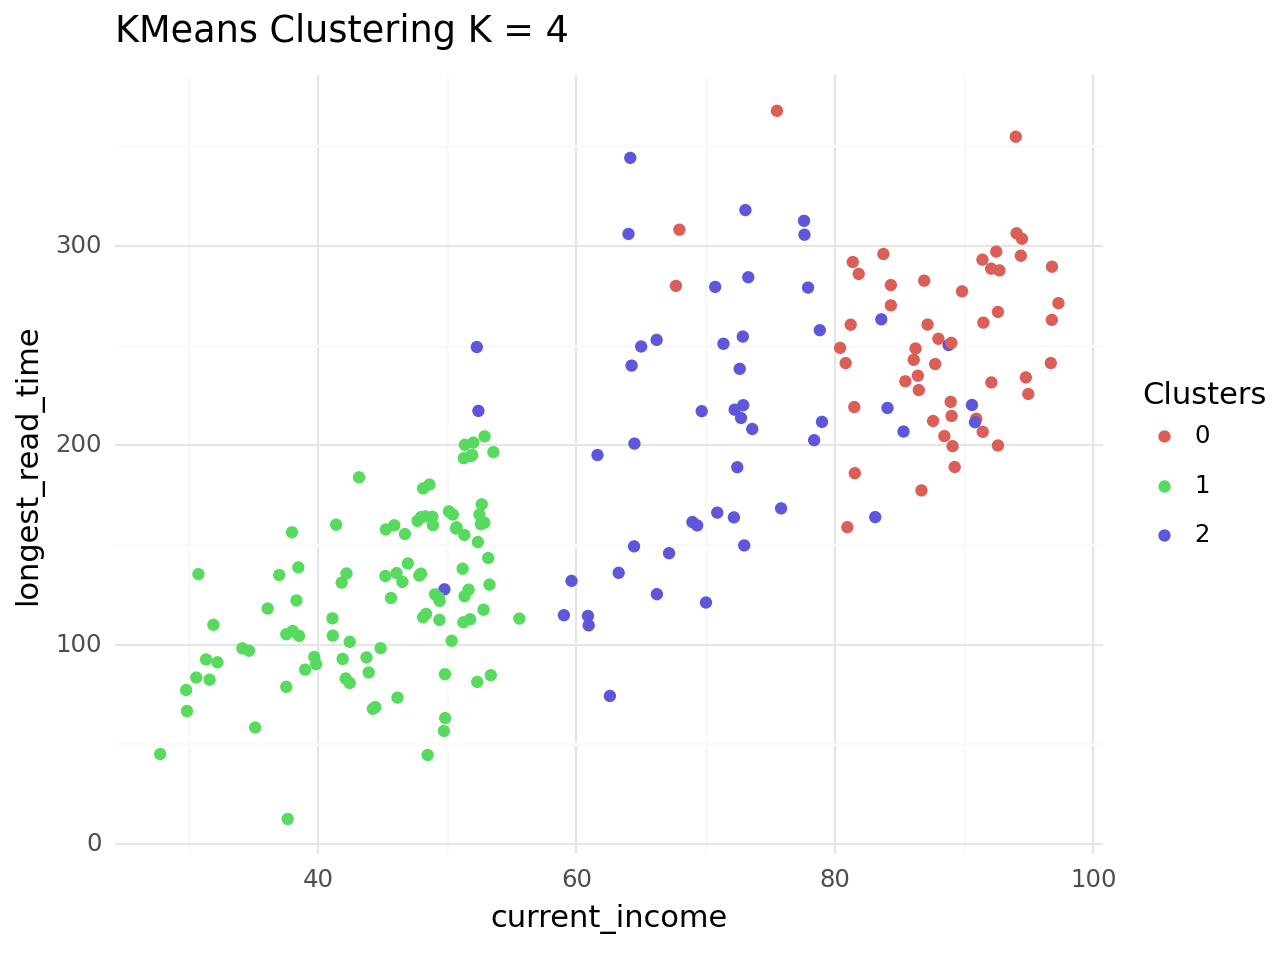

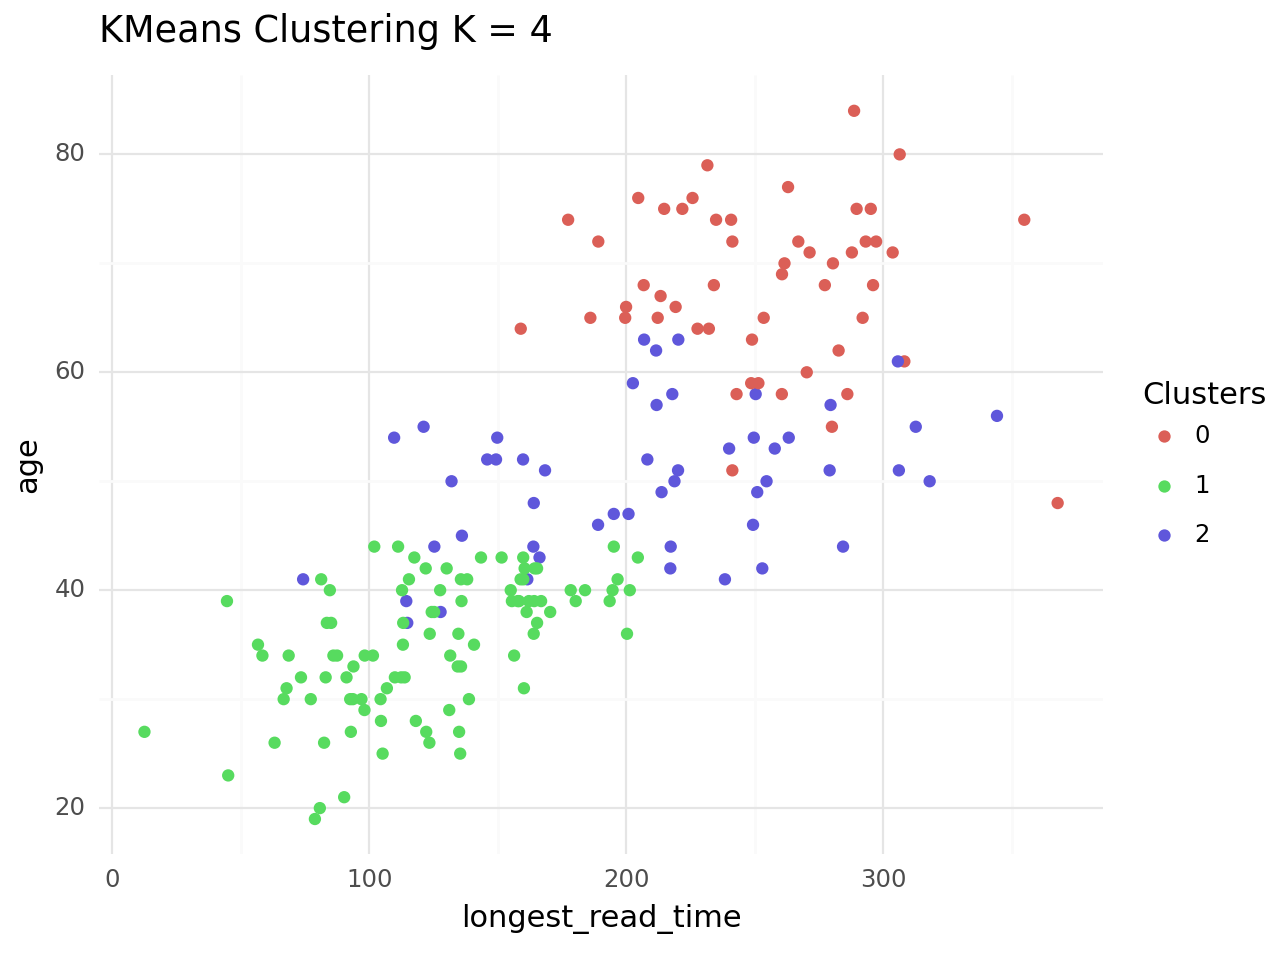

In [ ]:

# Load in data
behavioral = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW3_behavioral.csv")
behavioral.head()

# Predictors
predictors = ["age","current_income","time_spent_browsing", "length_of_subscription",
              "monthly_visits","longest_read_time", "prop_ads_clicked"]

X = behavioral[predictors]

z = make_column_transformer((StandardScaler(), predictors),
                            remainder="passthrough")


km = KMeans(n_clusters = 3)
pipe = Pipeline([("z", z), ("clust", km)])

labels = pipe.fit_predict(X[predictors])

print(silhouette_score(X, pipe.predict(X)))
X["clusters"] = labels

print(ggplot(X, aes(x = "current_income", y = "age", color = "factor(clusters)")) +
      geom_point() + theme_minimal() +
      labs(x = "current_income", y="age", title="KMeans Clustering K = 4",
           color="Clusters"))
print(ggplot(X, aes(x = "current_income", y="longest_read_time", color = "factor(clusters)")) +
      geom_point() + theme_minimal() +
      labs(x = "current_income", y = "longest_read_time", title = "KMeans Clustering K = 4", color="Clusters"))
print(ggplot(X, aes(x = "longest_read_time", y = "age", color = "factor(clusters)")) +
      geom_point() + theme_minimal() +
      labs(x = "longest_read_time", y = "age", title = "KMeans Clustering K = 4",
           color = "Clusters"))


   age  current_income  time_spent_browsing  length_of_subscription  \
0   44           72.19           566.839925              351.582980   
1   37           59.03           593.367495              427.828363   
2   41           62.59           558.474711              455.073149   
3   47           61.63           546.606458              436.046753   
4   55           67.70           679.886891              880.950477   

   monthly_visits  longest_read_time     gender  prop_ads_clicked   id  \
0       32.736695         163.867691      woman          0.103480   64   
1       36.015413         114.804382  nonbinary          0.131423   58   
2       32.610060          74.286961        man          0.202710  161   
3       32.516673         195.150214      woman          0.131722   92   
4       32.240694         280.023385      other          0.233705   63   

   clusters         pc1         pc2  
0         2 -116.491608  101.963039  
1         2  -46.027561   78.247823  
2         2  -

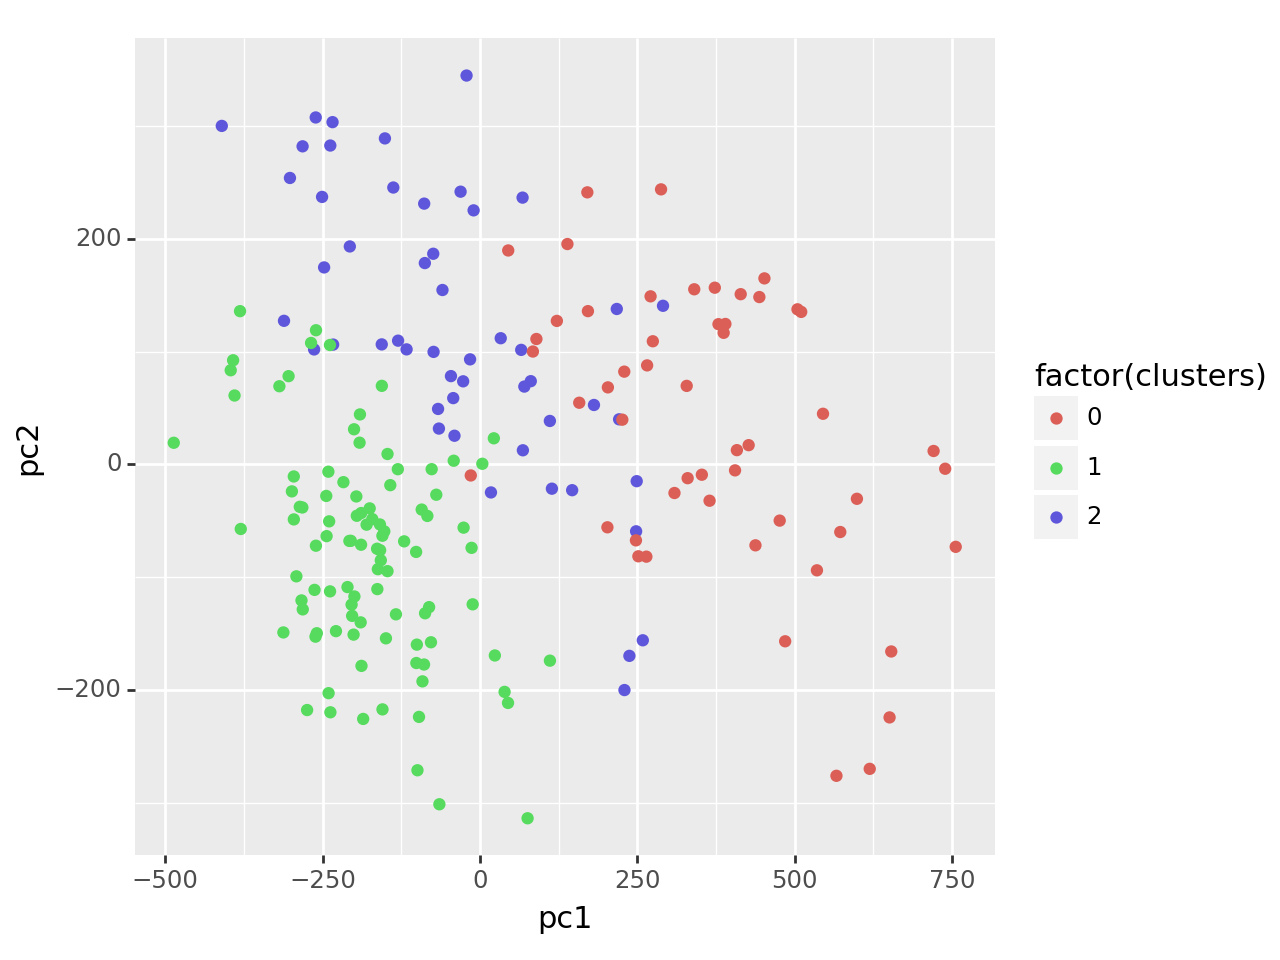

In [ ]:
pca = PCA(n_components = 2)  # use this in methods for why did you choose 3 clusters
pipe = Pipeline([ ("pca", pca)])

pipe.fit(X[predictors])

behavioral["clusters"] = labels
behavioral[["pc1", "pc2"]] = pd.DataFrame(pipe.transform(behavioral[predictors]))
pd.DataFrame(pipe.transform(behavioral[predictors]))

print(behavioral.head())

print(ggplot(behavioral, aes(x = "pc1", y = "pc2", color = "factor(clusters)" )) +
      geom_point() )



#2. Article Clustering

Silhouette Score: 0.03329417492910098


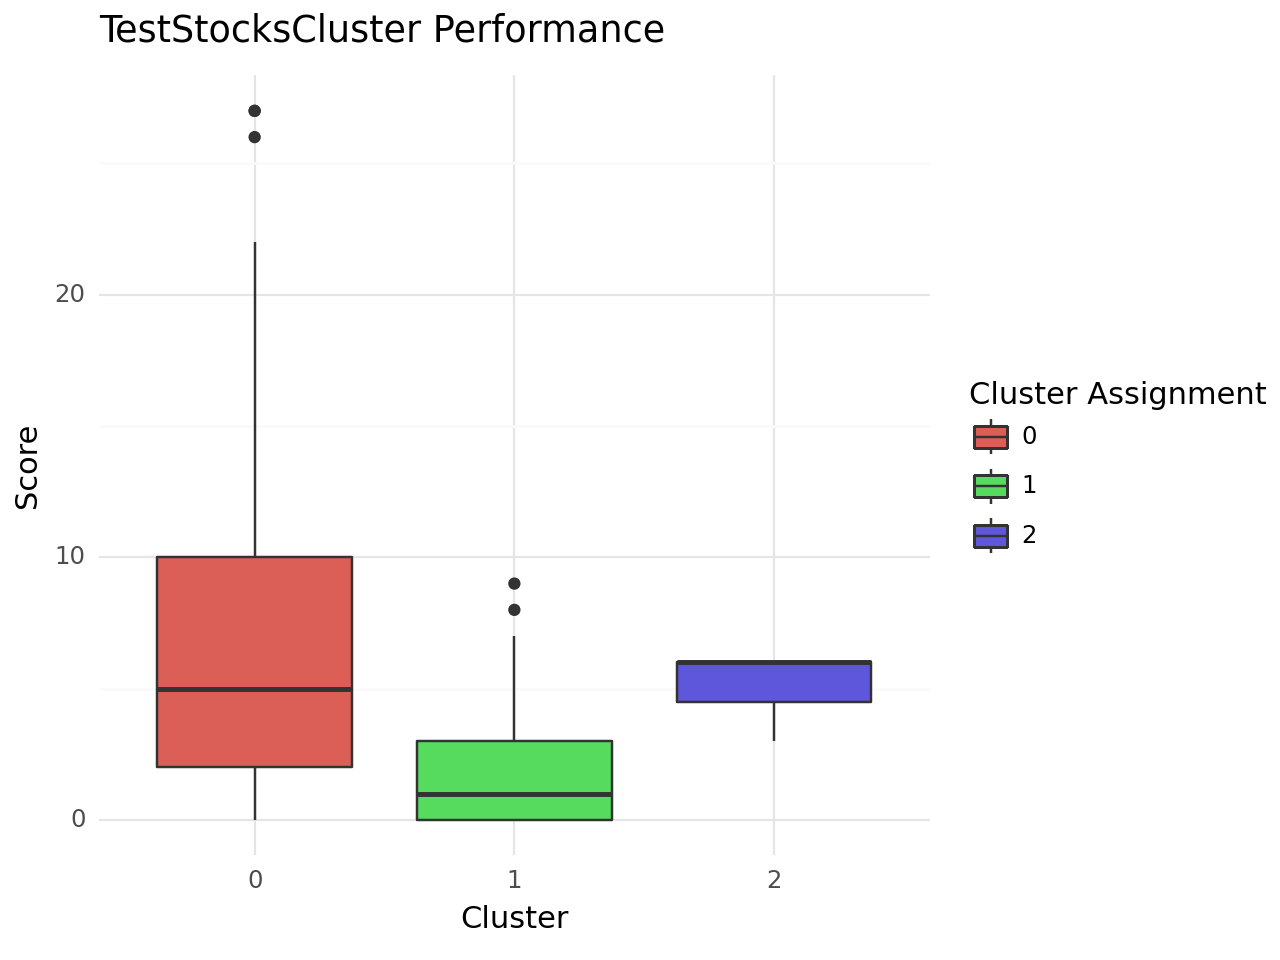

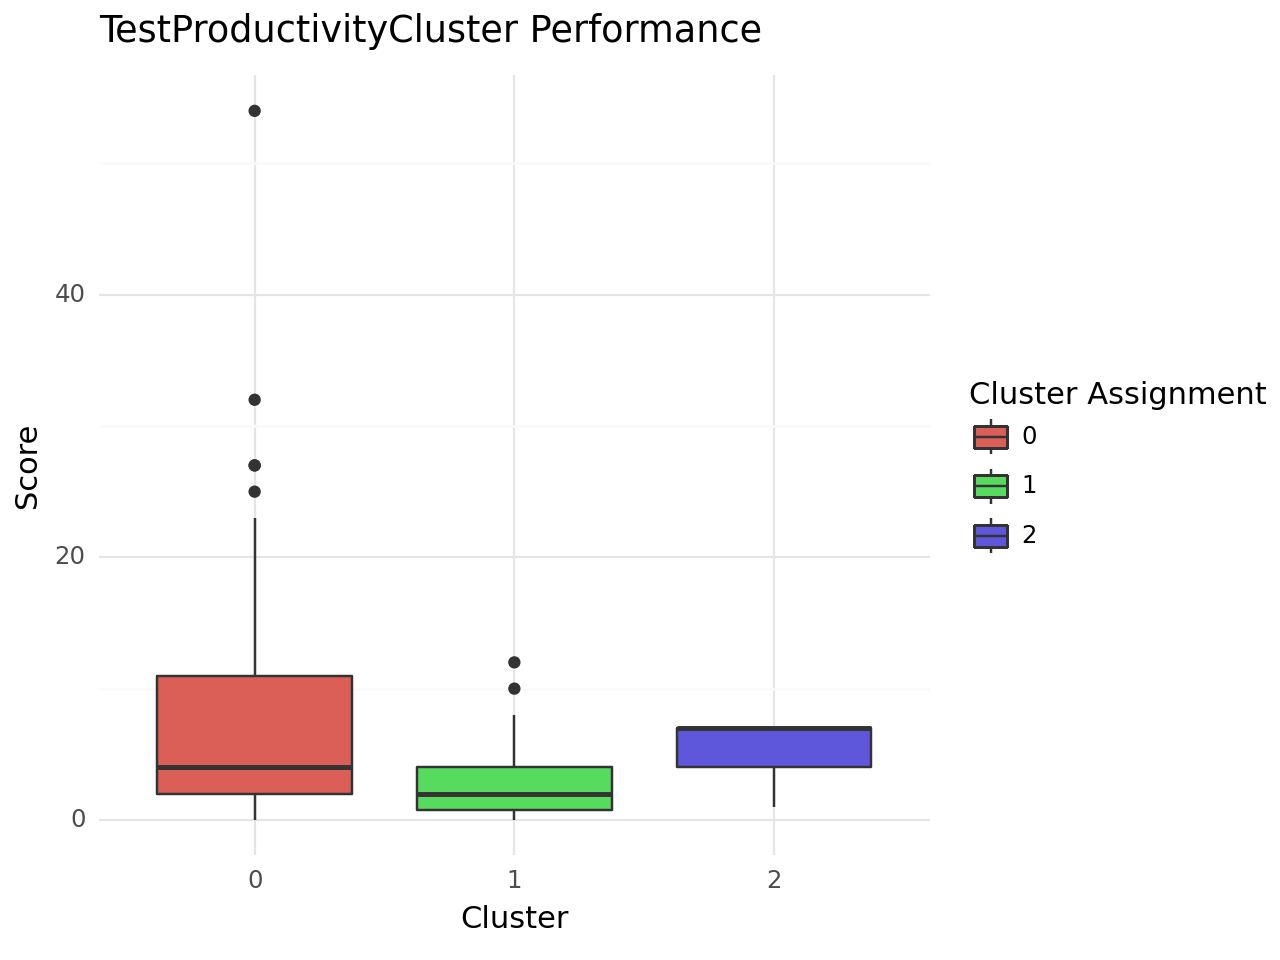

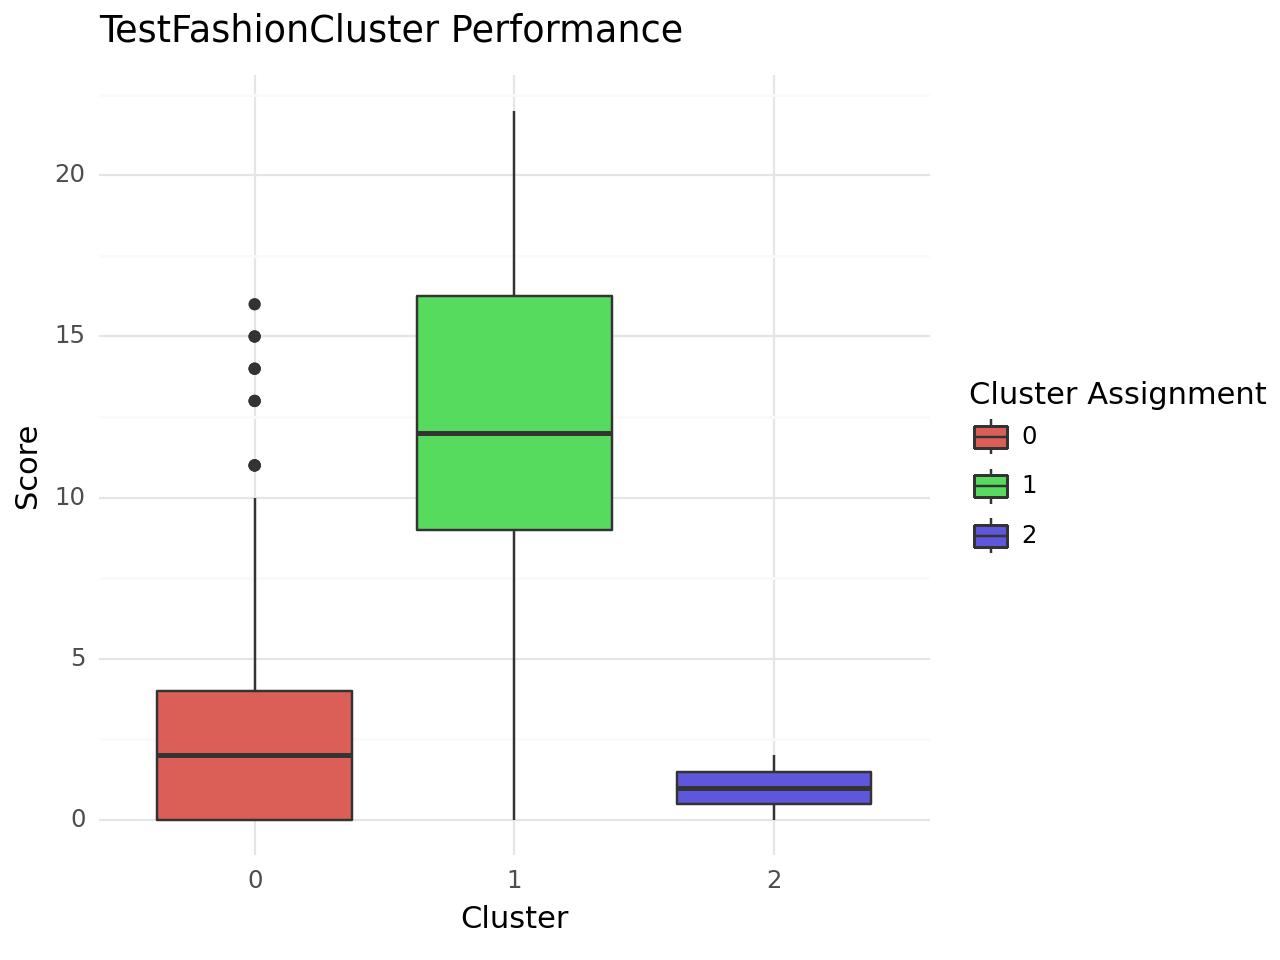

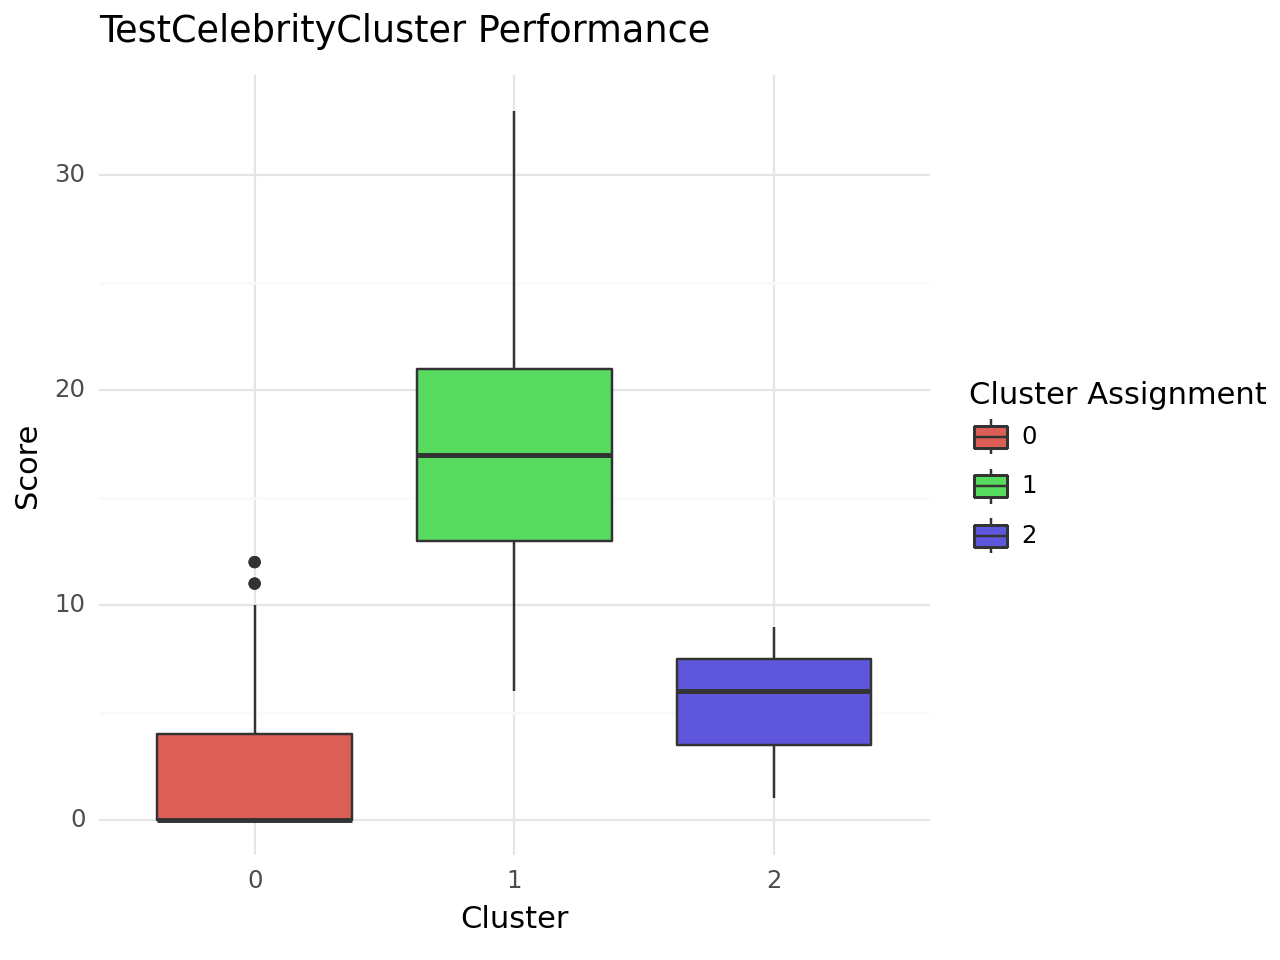

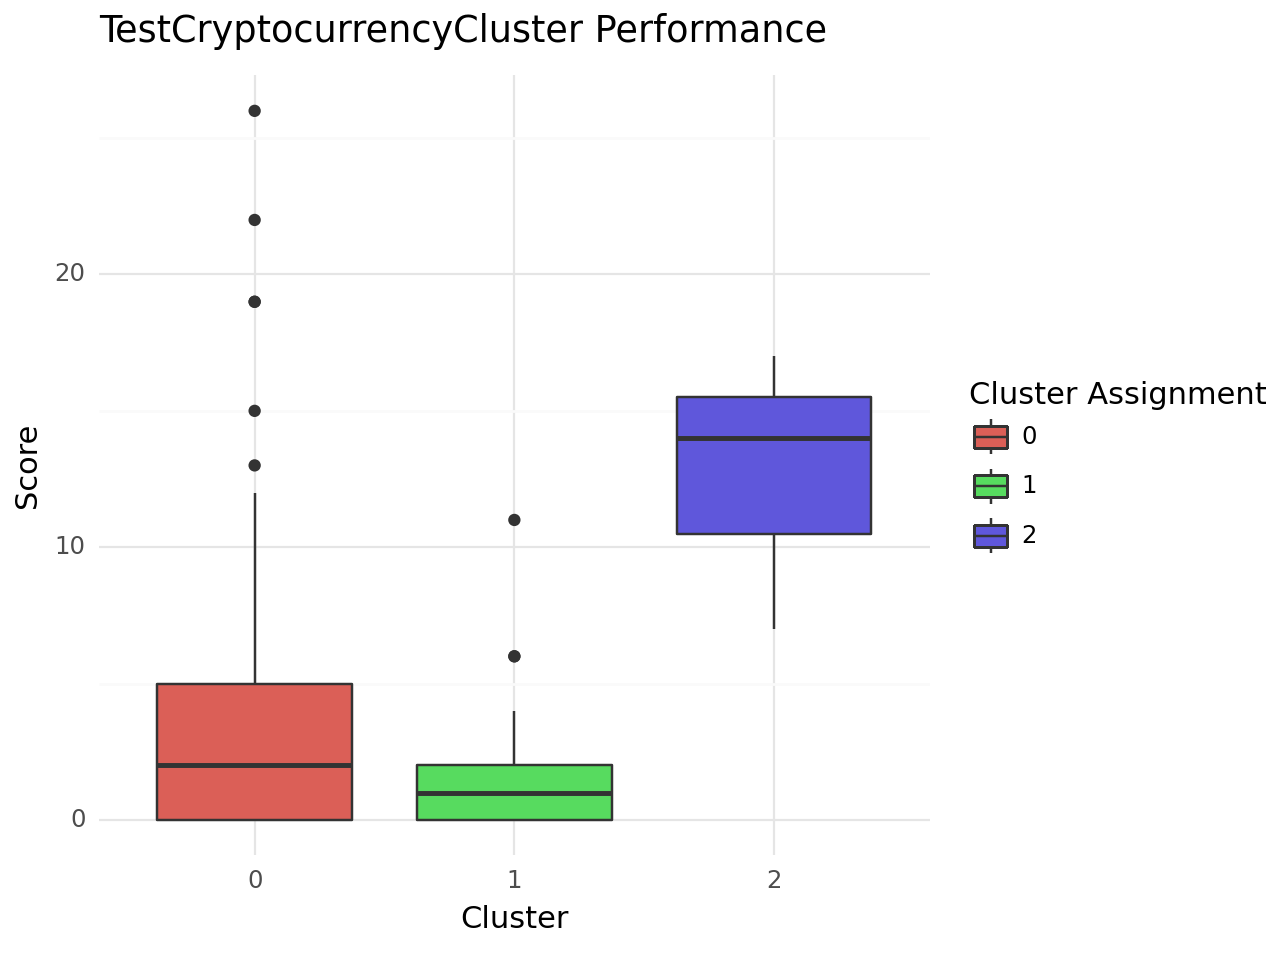

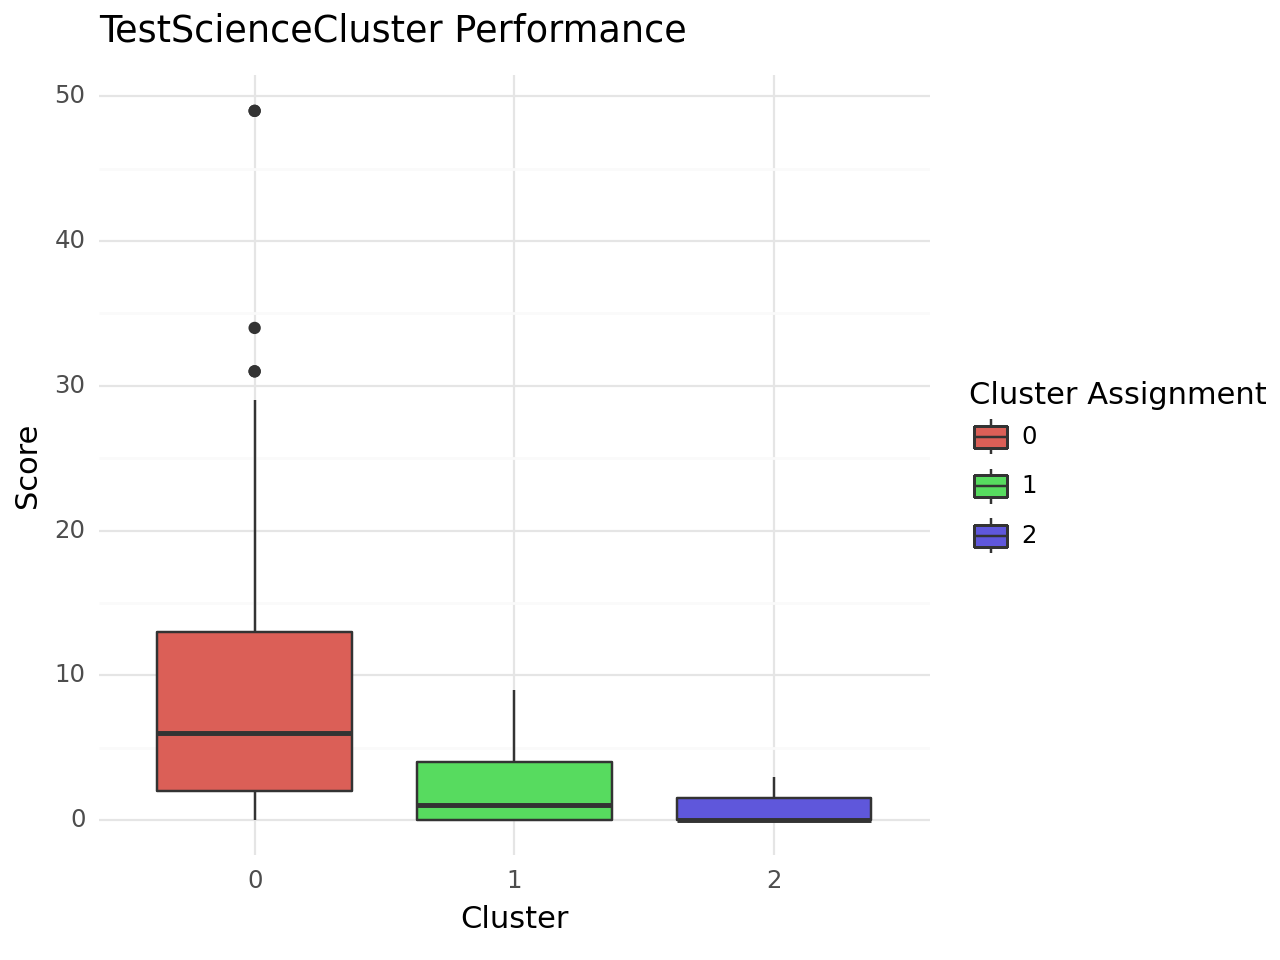

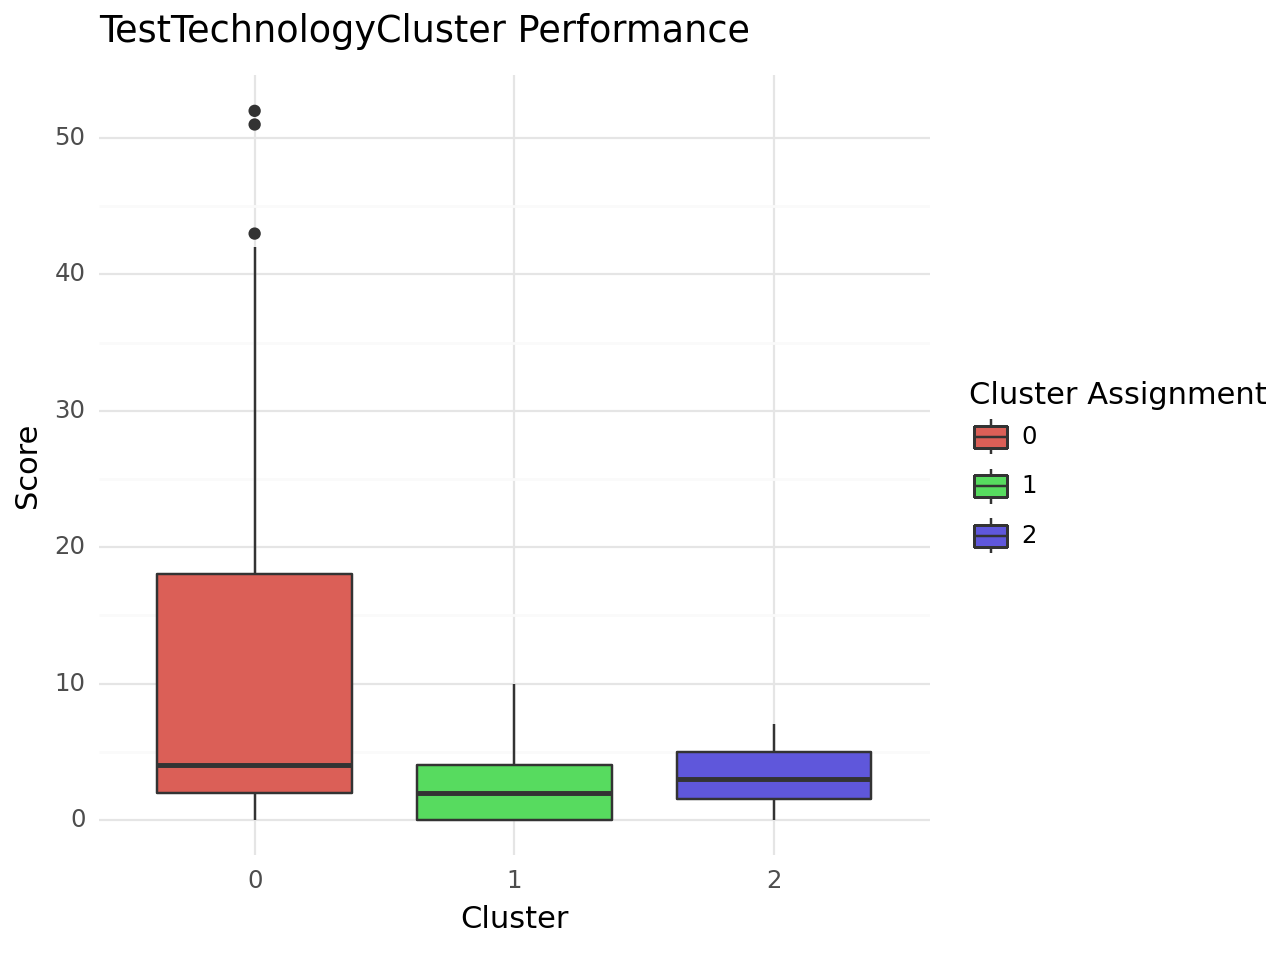

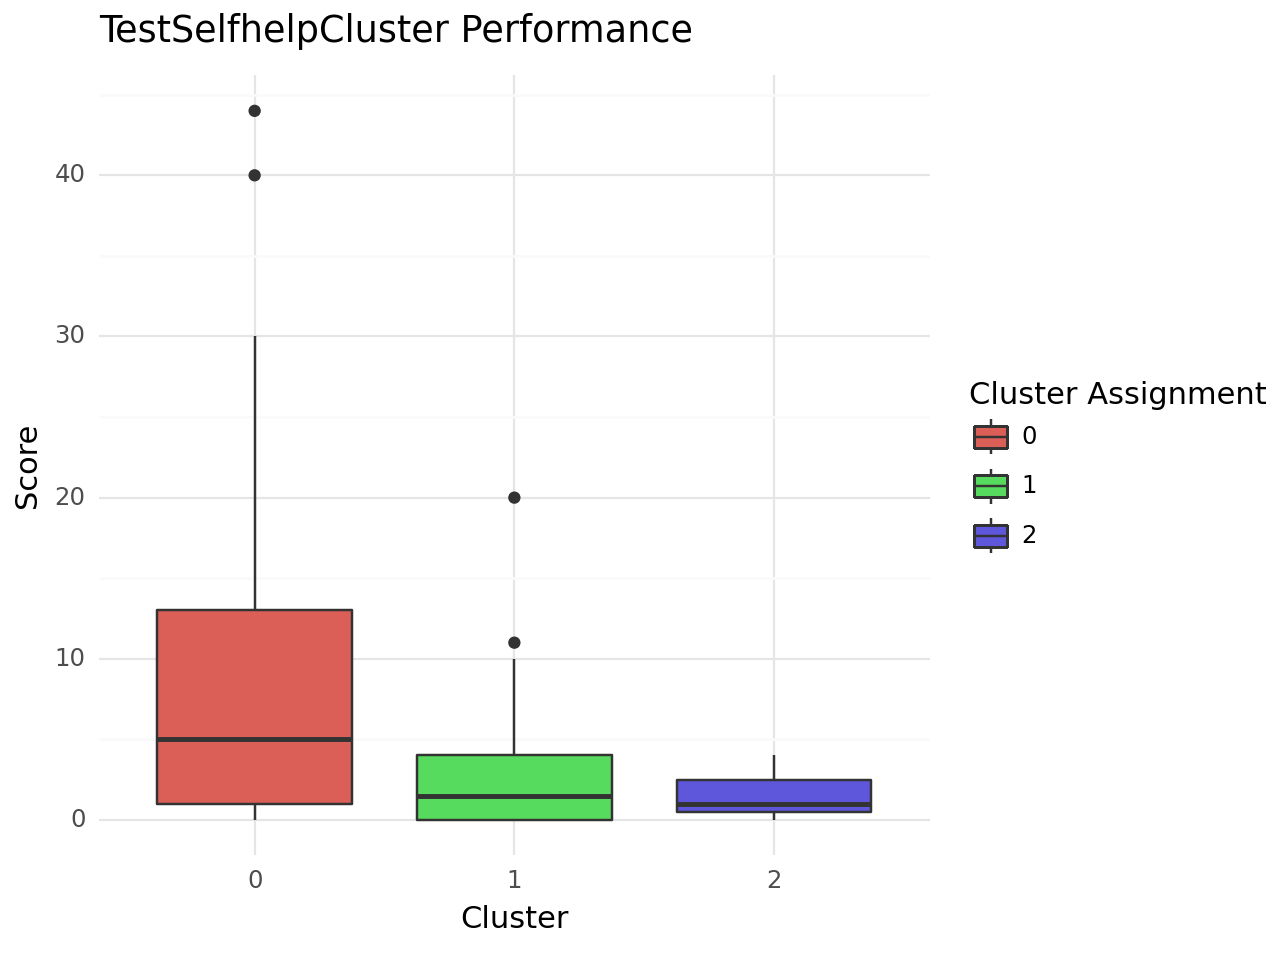

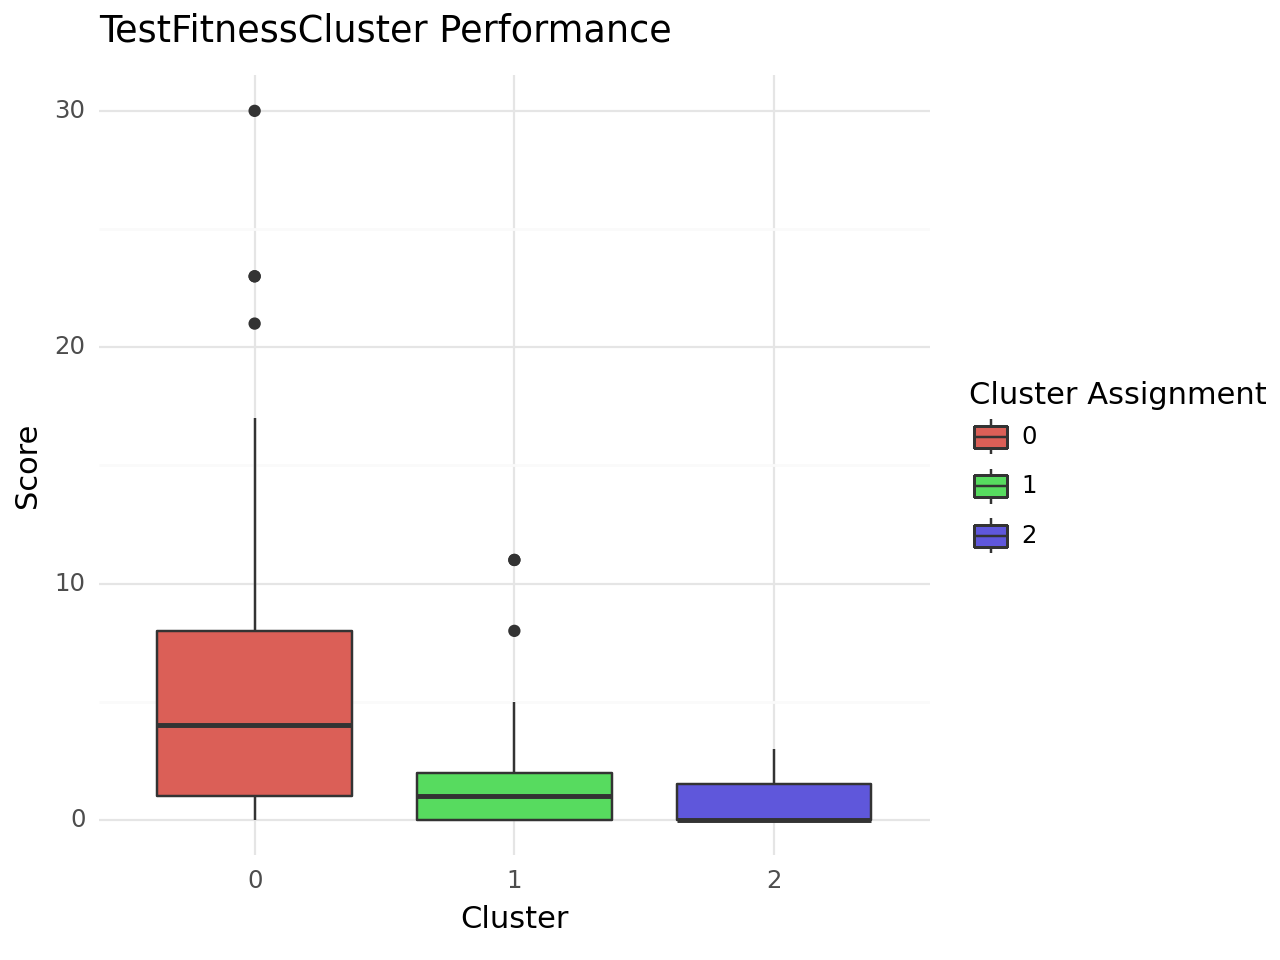

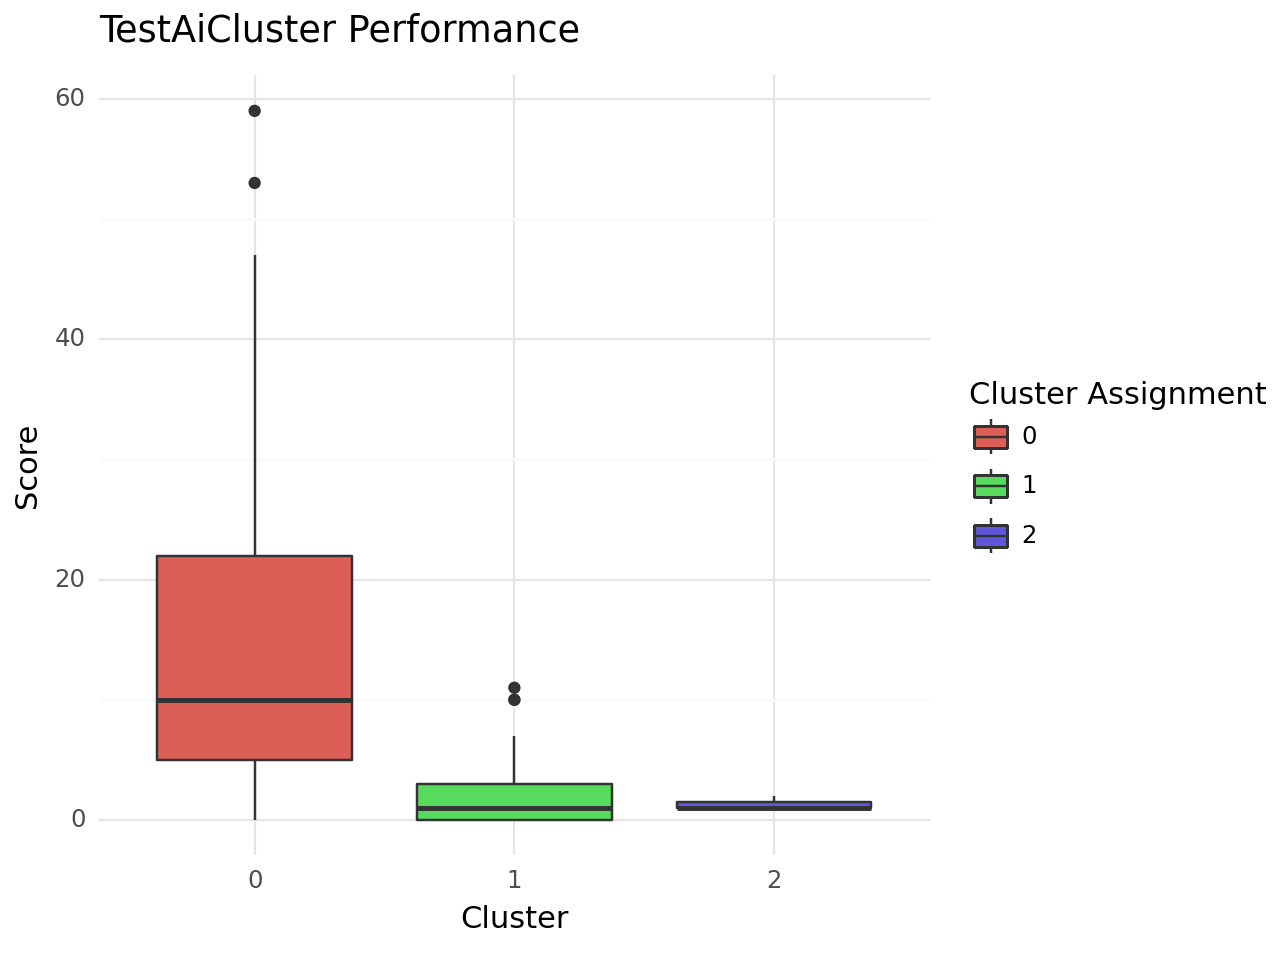

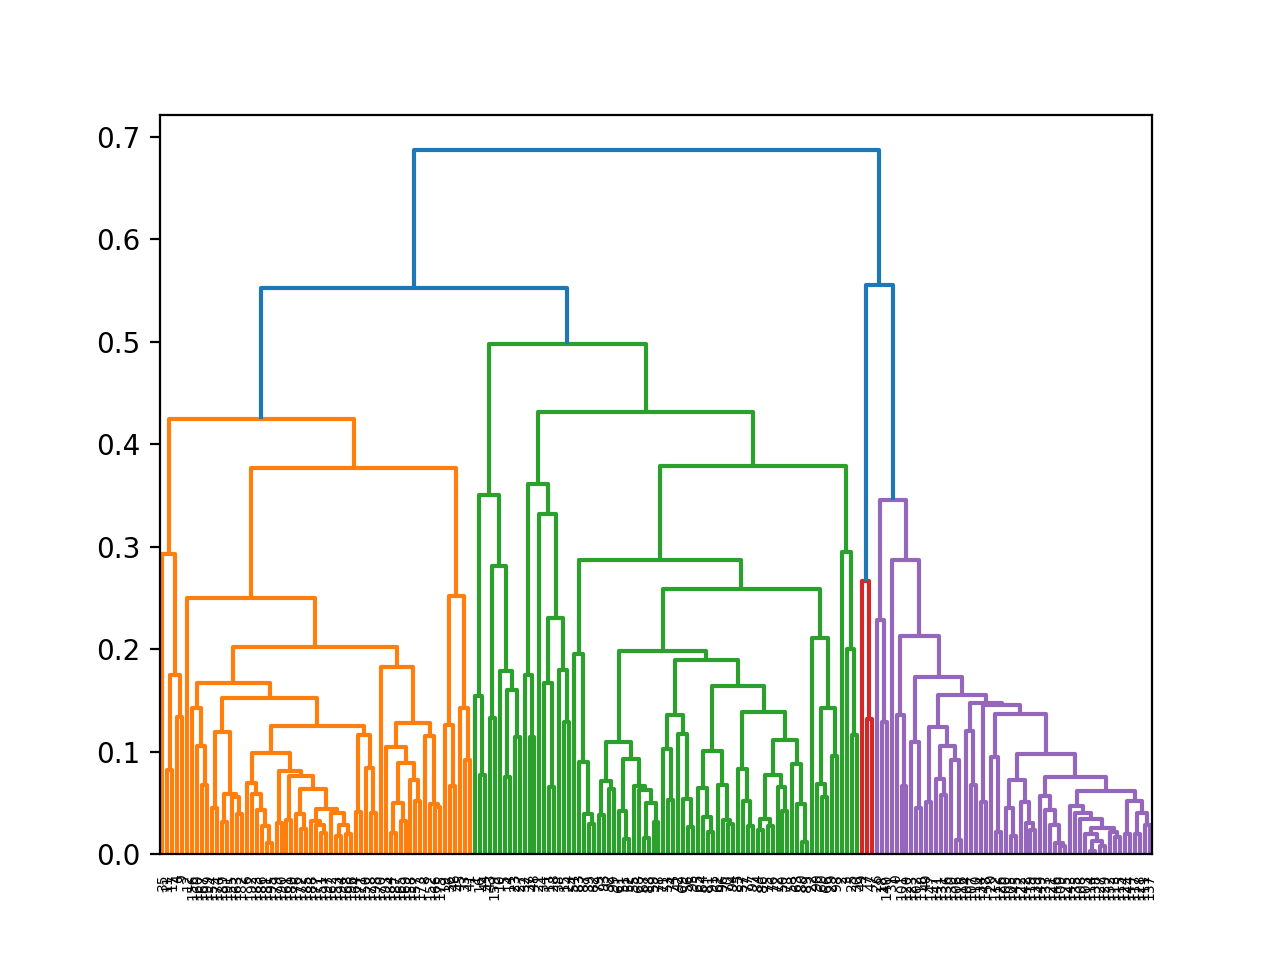

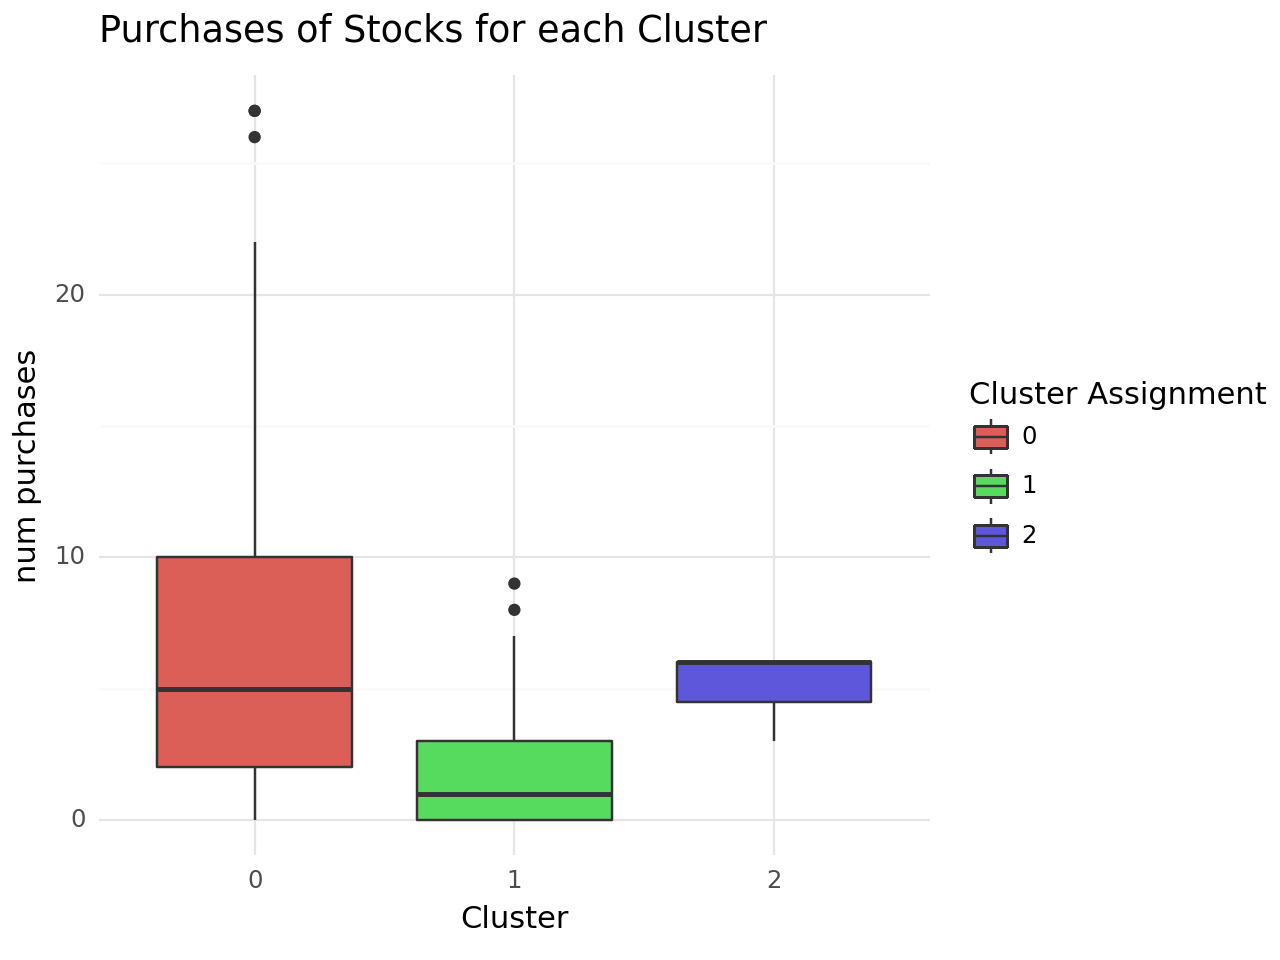

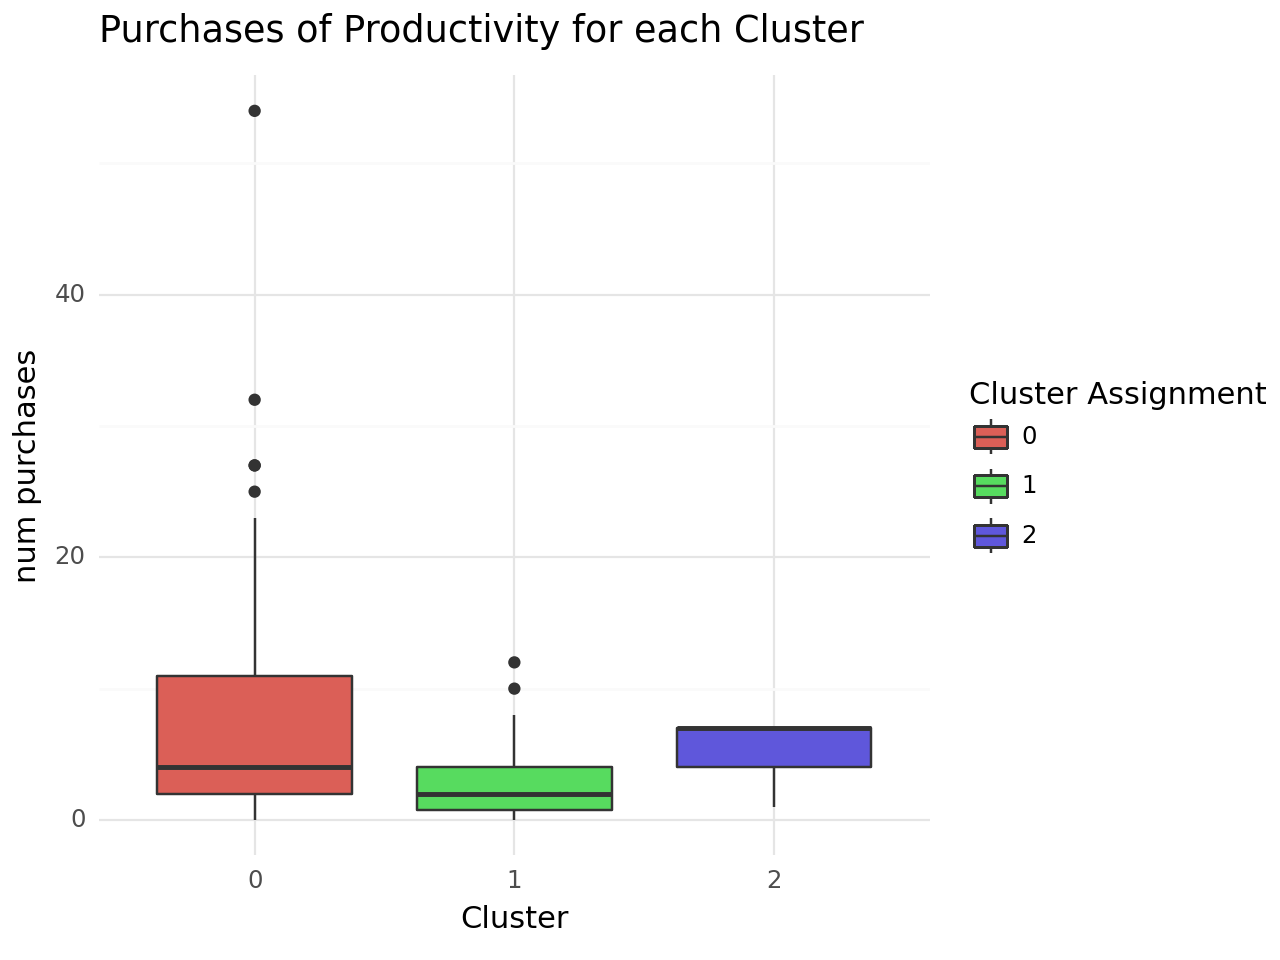

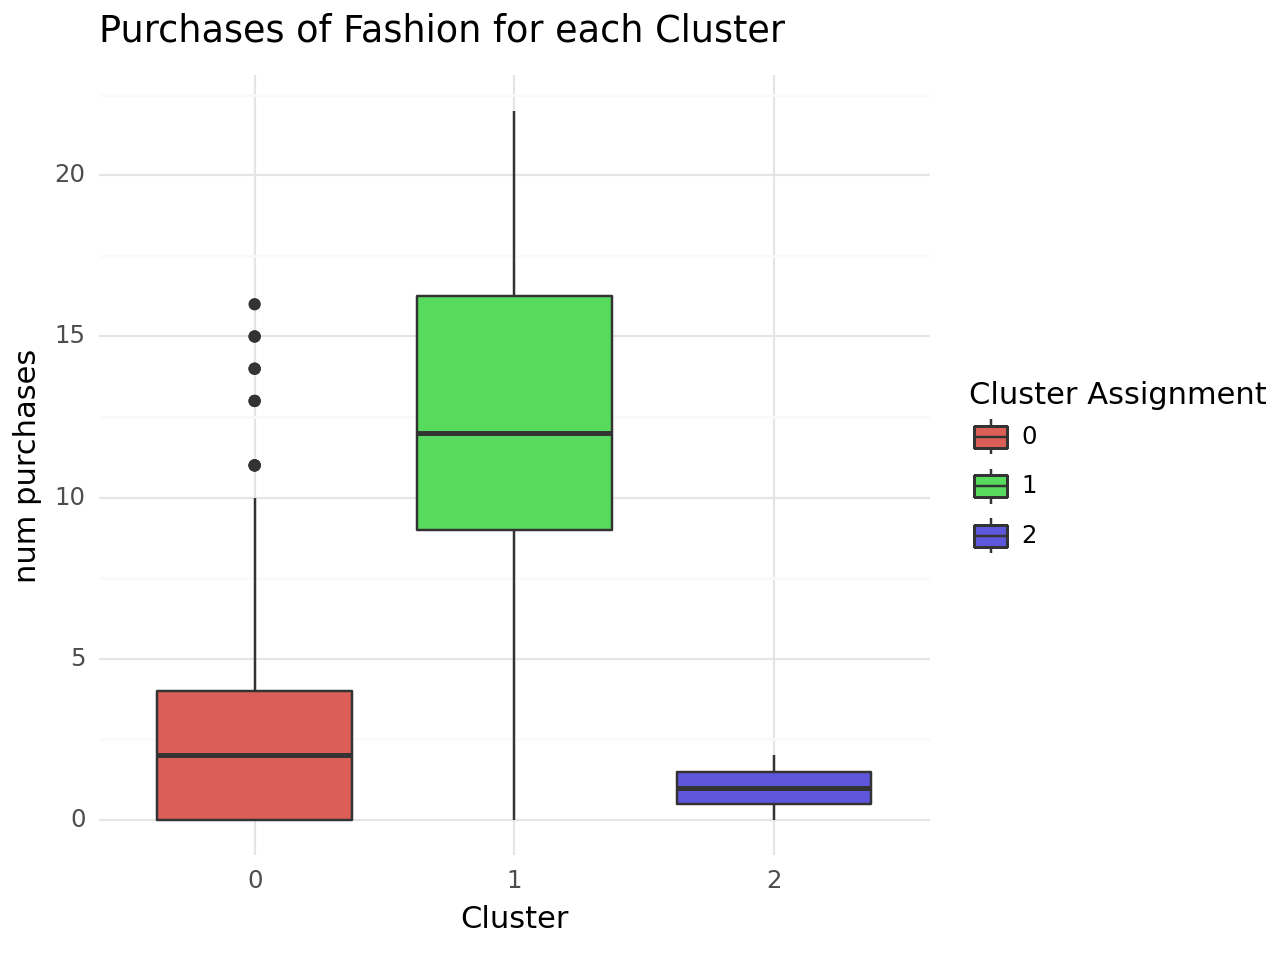

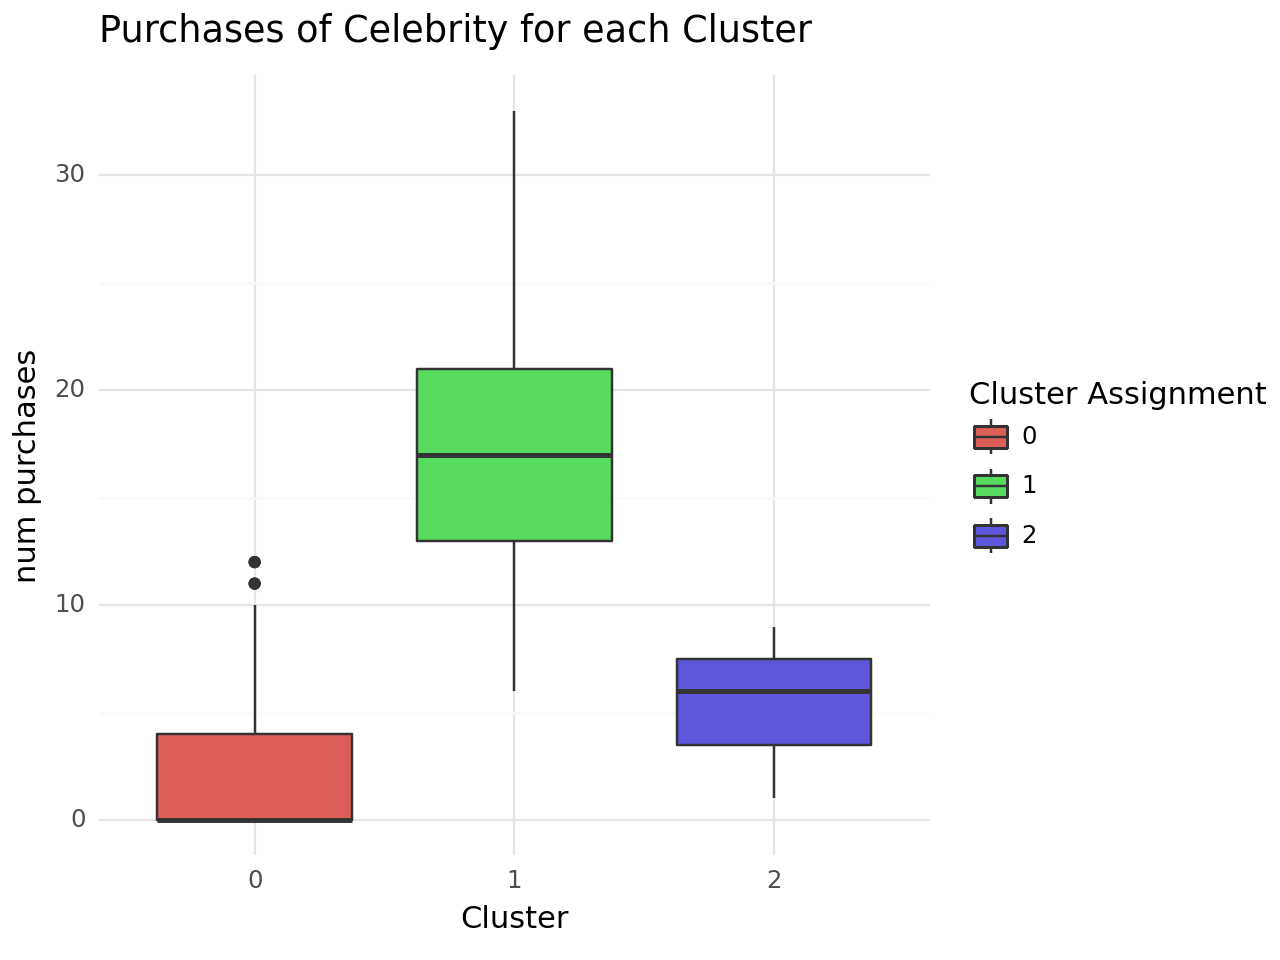

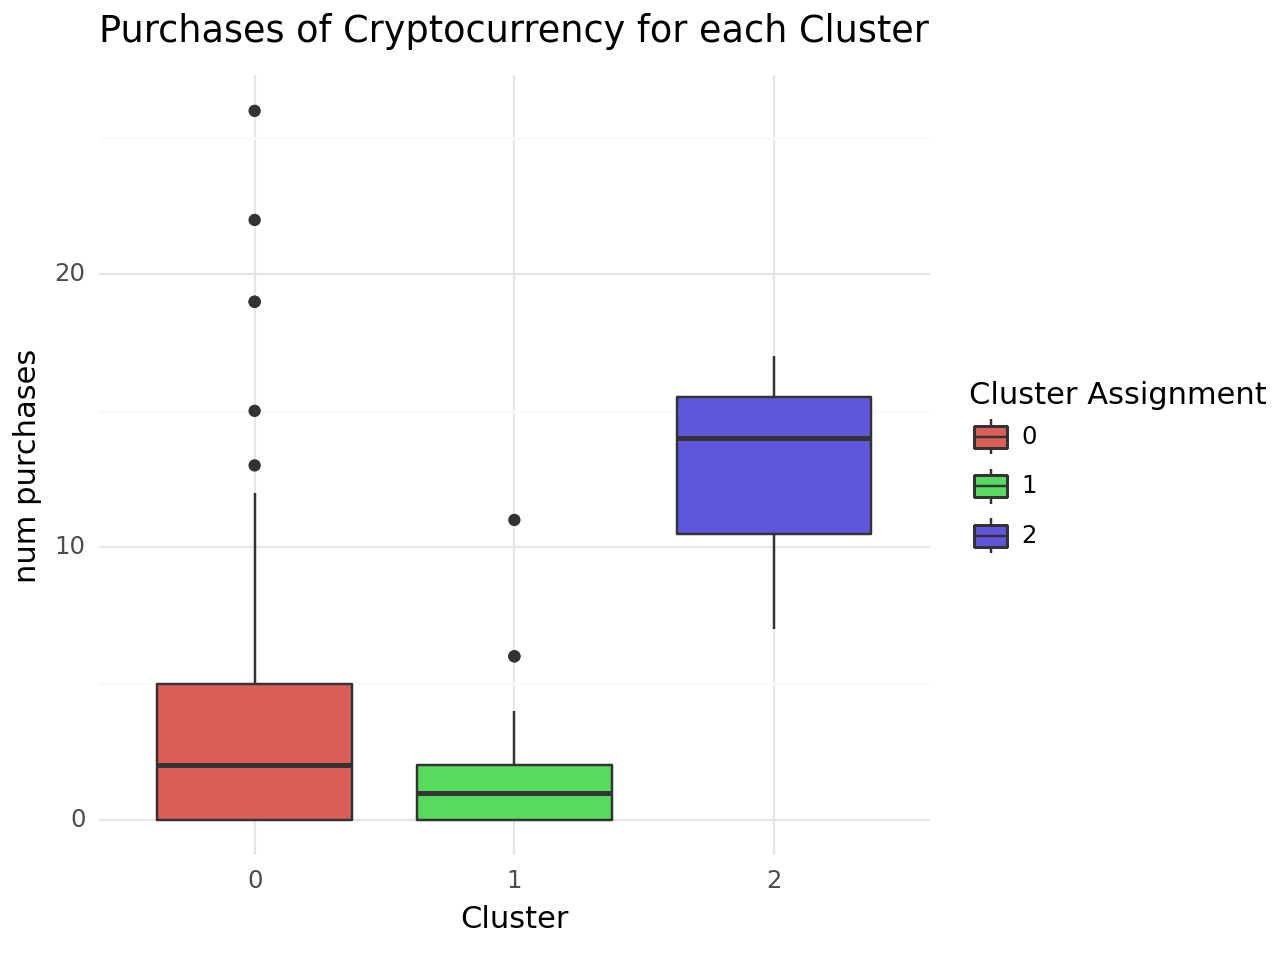

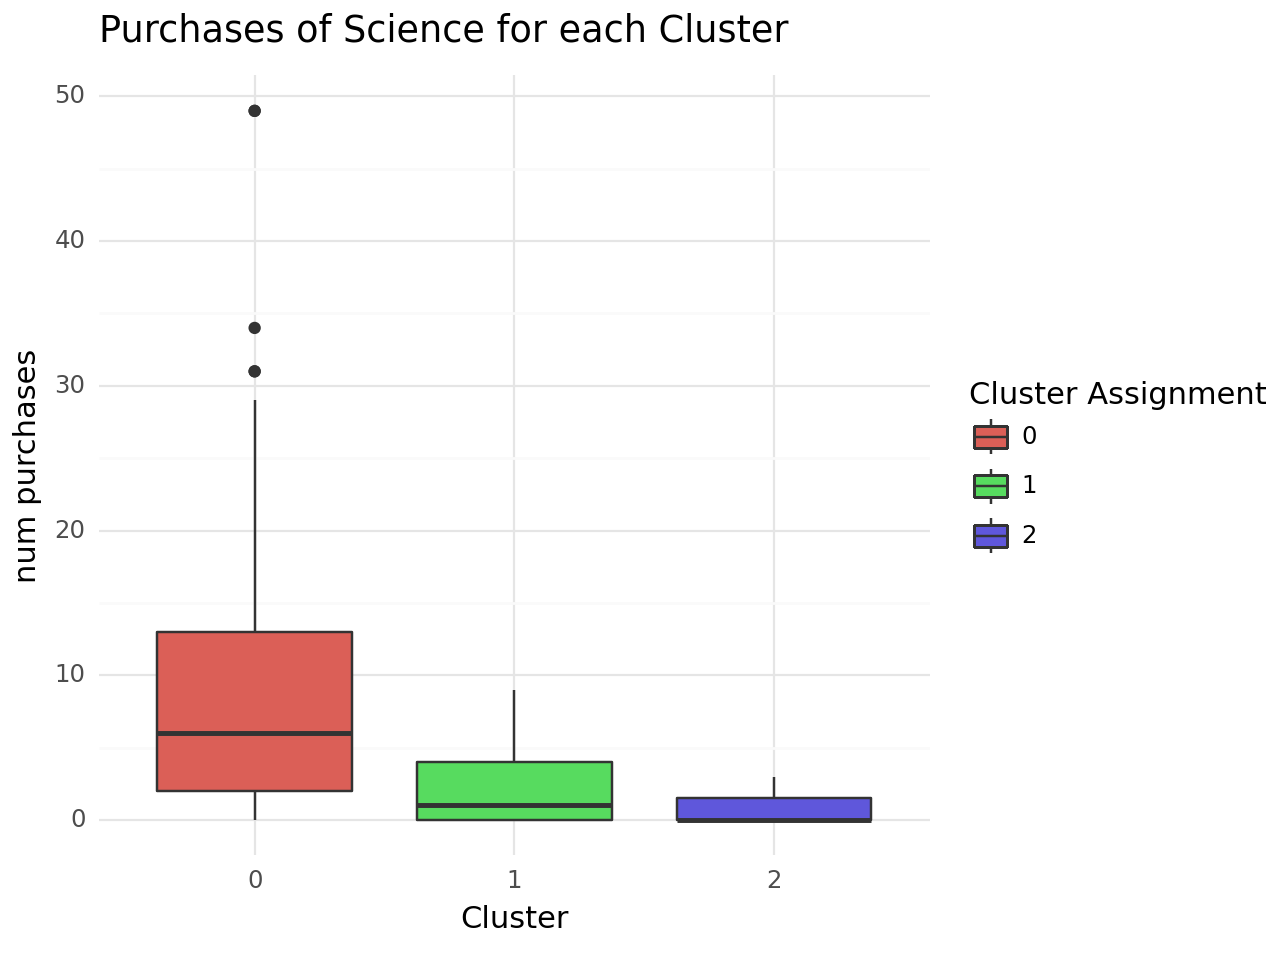

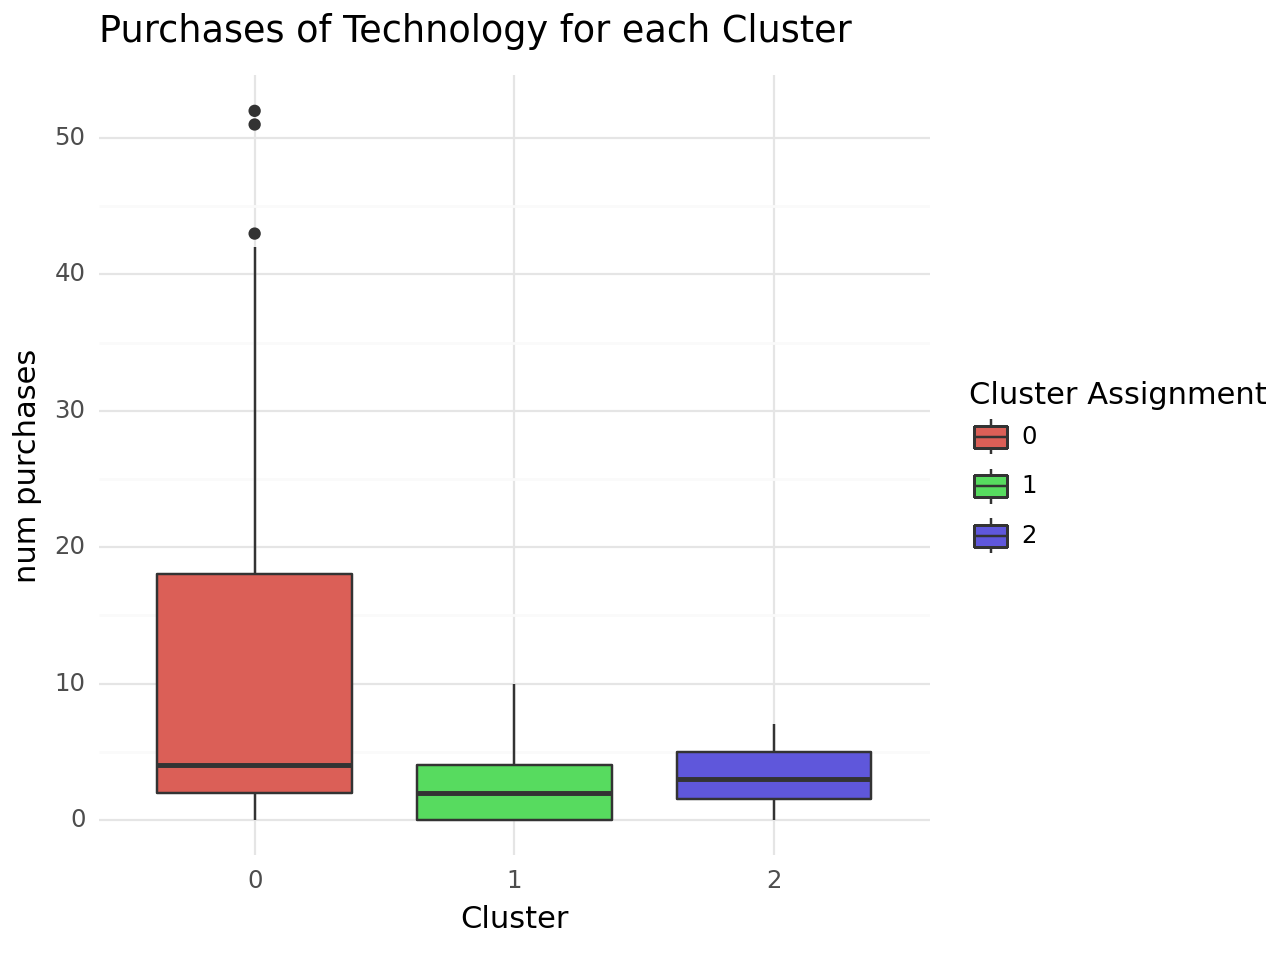

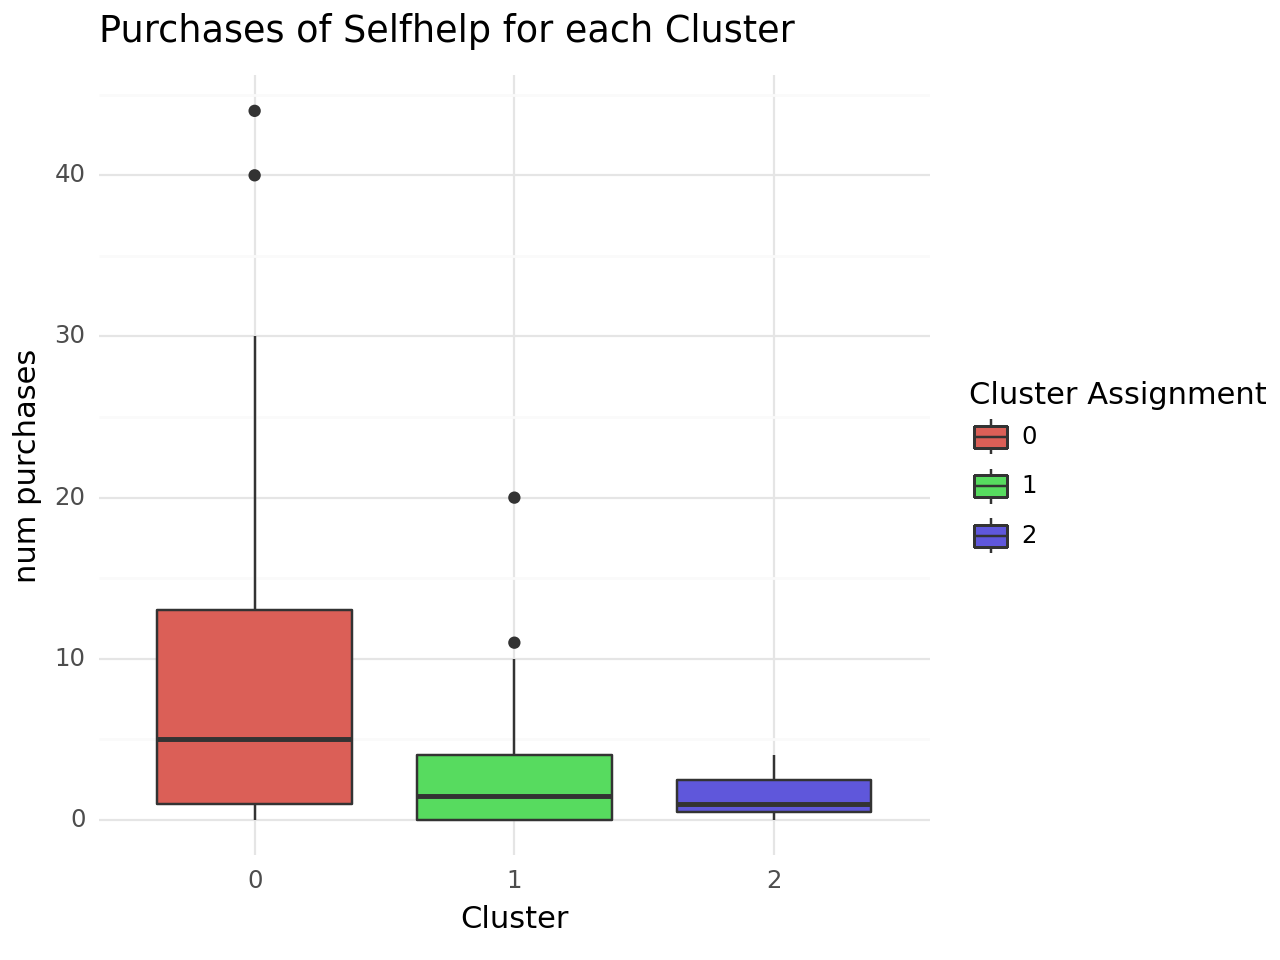

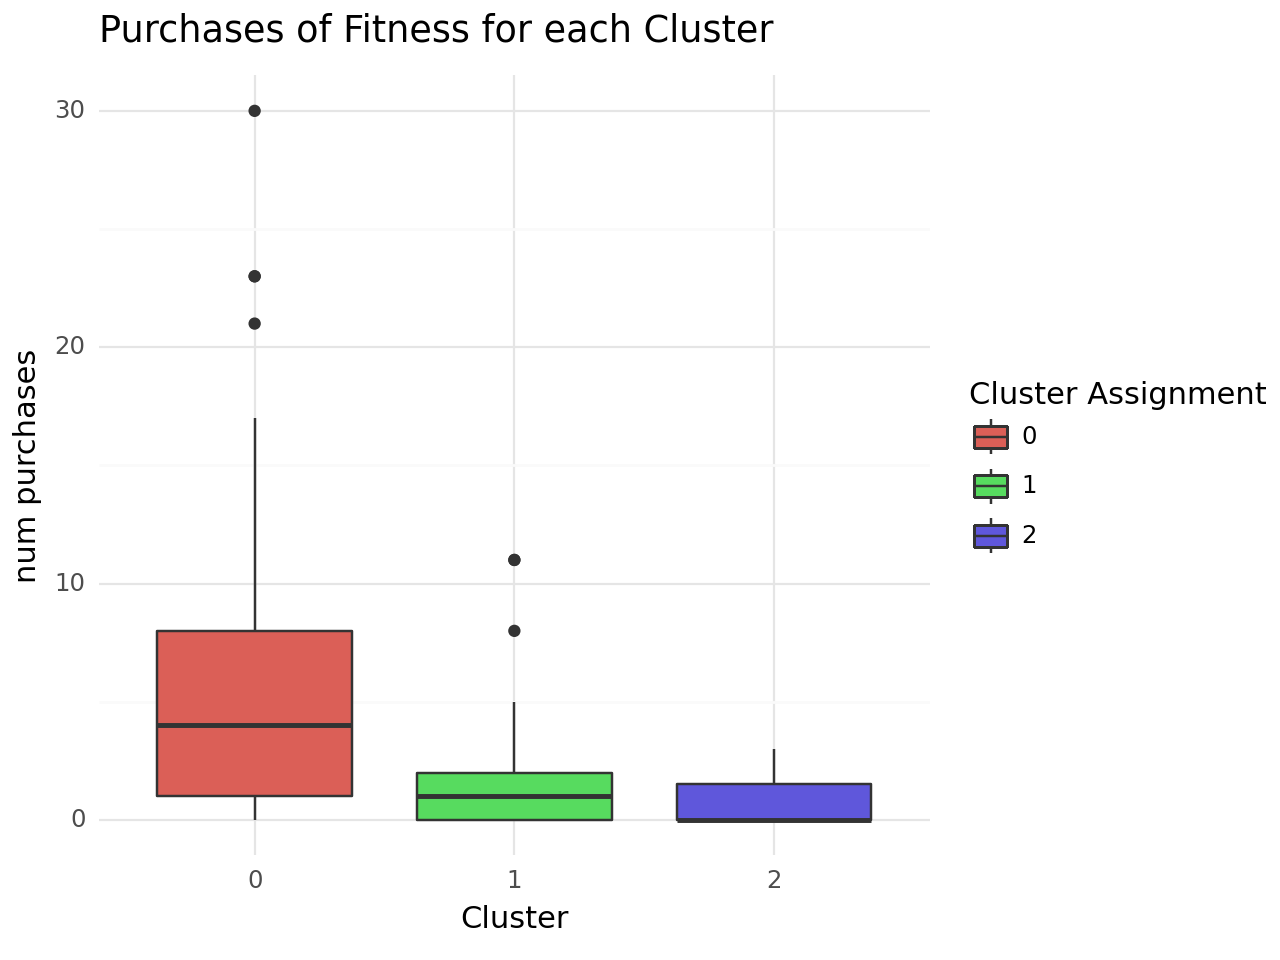

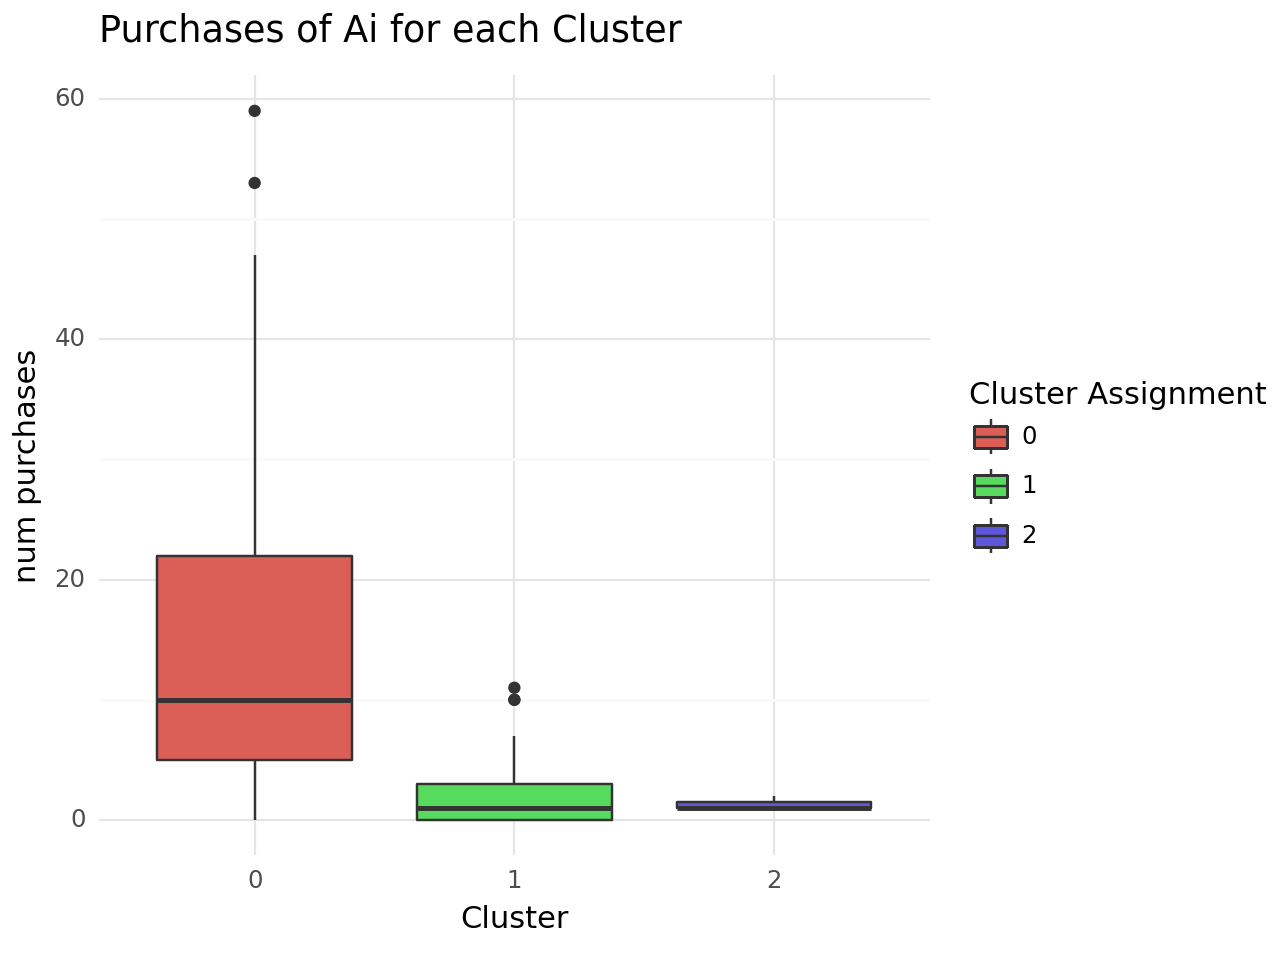

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from plotnine import ggplot, aes, geom_boxplot, theme_minimal, scale_fill_discrete, labs

# Load in data
article = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW3_topics.csv")
article.head()

features = ["Stocks", "Productivity", "Fashion", "Celebrity", "Cryptocurrency", "Science", "Technology", "SelfHelp", "Fitness", "AI"]

X = article[features]

# Make an empty model
hac = AgglomerativeClustering(affinity="cosine",
                              linkage="average",
                              n_clusters = 3)

pipe = Pipeline([("model", hac)])

# Fit model and get labels
labels = pipe.fit_predict(X[features])

# Calculate silhouette score
silhouette_score = silhouette_score(X[features], labels)
print("Silhouette Score:", silhouette_score)

article["cluster_3"] = labels

# Loop for printing boxplots
for test in features:
    title = "Test" + test.capitalize() + "Cluster Performance"
    print(ggplot(article, aes(x = "factor(cluster_3)", y=test))
          + geom_boxplot(aes(fill = "factor(cluster_3)")) +
          theme_minimal() +
          scale_fill_discrete(name = "Cluster Assignment") +
          labs(x = "Cluster", y = "Score", title=title))

# Plot dendrogram
def plot_dendrogram(X, method = 'average', metric = 'cosine', title = 'Hierarchical Clustering Dendrogram', **kwargs):
    Z = linkage(X, method=method, metric=metric)
    dendrogram(Z, **kwargs)

plot_dendrogram(X[features], color_threshold=0.55)


# Plot boxplots
for product in features:
    title = "Purchases of " + product.capitalize() + " for each Cluster"
    print(ggplot(article, aes(x="factor(cluster_3)", y=product)) +
          geom_boxplot(aes(fill="factor(cluster_3)")) +
          theme_minimal() +
          scale_fill_discrete(name="Cluster Assignment") +
          labs(x="Cluster", y= "num purchases", title=title))


In [ ]:
# Count the number of individuals in each cluster
article.groupby(article["cluster_3"]).count()

,Stocks,Productivity,Fashion,Celebrity,Cryptocurrency,Science,Technology,SelfHelp,Fitness,AI,id
cluster_3,,,,,,,,,,,
0,141,141,141,141,141,141,141,141,141,141,141
1,56,56,56,56,56,56,56,56,56,56,56
2,3,3,3,3,3,3,3,3,3,3,3
